# Neural Networks - Assignment 3 for the Artificial Intelligence Course
- author: **Martin Sivák**
- AIS ID: **116291**
- Date: **09.12.2023**

## Assignment Description
In this assignment we were instructed to design a neural network, which would be able to classify data from a known dataset (from the *scikit-learn* module). We had to design three neural networks with different architectures and divide the input dataset into a train and test subset. Next we had to train a neural networks and evaluate its performance with different metrics and graphic visualizations.

## Evaluation and Metrics
Evaluation is essential for understanding how well the neural network model performs on an unseen data. It provides insights into the model's precision, recall, and overall accuracy. We evaluated the model on following key metrics:

### Accuracy
- **Definition**: The ratio of correctly predicted instances to the total instances.
- **Example**: The model is correct 70% of the time.

### Precision
- **Definition**: The ability of the classifier not to label as positive a sample that is negative.
- **Example**:
- **Class 0 (1.00)**: All items predicted as Class 0 were indeed Class 0.
- **Class 1 (0.00)**: None of the items predicted as Class 1 were actually Class 1.
- **Class 2 (0.55)**: 55% of items predicted as Class 2 were actually Class 2.

### Recall
- **Definition**: The ability of the classifier to find all the positive instances.
- **Example**:
- **Class 0 (1.00)**: All actual Class 0 items were correctly predicted.
- **Class 1 (0.00)**: None of the actual Class 1 items were predicted.
- **Class 2 (55.00)**: 55% of the actual Class 2 items were correctly predicted.

### F1-Score
- **Definition**: The harmonic mean of precision and recall.
- **Example**:
- **Class 0 (1.00)**: The harmonic mean of precision and recall for Class 0.
- **Class 1 (0.00)**: The harmonic mean of precision and recall for Class 1.
- **Class 2 (0.71)**: The harmonic mean of precision and recall for Class 2.

### Support
- **Definition**: The number of actual instances of each class.
- **Example**:
- **Class 0 (10)**: Number of actual items in Class 0.
- **Class 1 (9)**: Number of actual items in Class 1.
- **Class 2 (11)**: Number of actual items in Class 2.

## Loading and Inspecting the Iris Dataset

Firstly, we load the famous Iris dataset from *scikit-learn* and store it in a Pandas DataFrame with tabular structure. The Iris dataset is a classic dataset in machine learning, containing measurements of **sepal length**, **sepal width**, **petal length**, and **petal width** for 150 iris flowers, with 50 samples from each of three different species.

This initial code cell aims to load the dataset, provide basic information about its structure, and display the first few rows to give an overview of the data. We can see that our data looks very nice, all records posses only numeric values (floats or integers) and we have 0 missing values.

### Functions/Modules Used
- `load_iris`: A function from scikit-learn to load the Iris dataset.
- `pd.DataFrame`: Creates a Pandas DataFrame to organize and manipulate the data.

In [236]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data["target"] = iris.target

# Inspecting dataset
print(data["target"].value_counts())
data.info()
data.head()

target
0    50
1    50
2    50
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualizing the Iris Dataset

We can visualize the distributions of the measurements in the Iris dataset for each flower type (for each value in the `target` column). We utilize Matplotlib and Seaborn for visualizing the distributions of measurements in the Iris dataset by writing a small function that creates the visualizations and displays them in a single plot. From these visualizations we see that feature distributions are almost normally distributed, with a minimum number of outliers.

### Functions/Modules Used
- `matplotlib.pyplot`: Used for creating subplots and adjusting layout.
- `seaborn`: Used for generating histograms with KDE (Kernel Density Estimation).

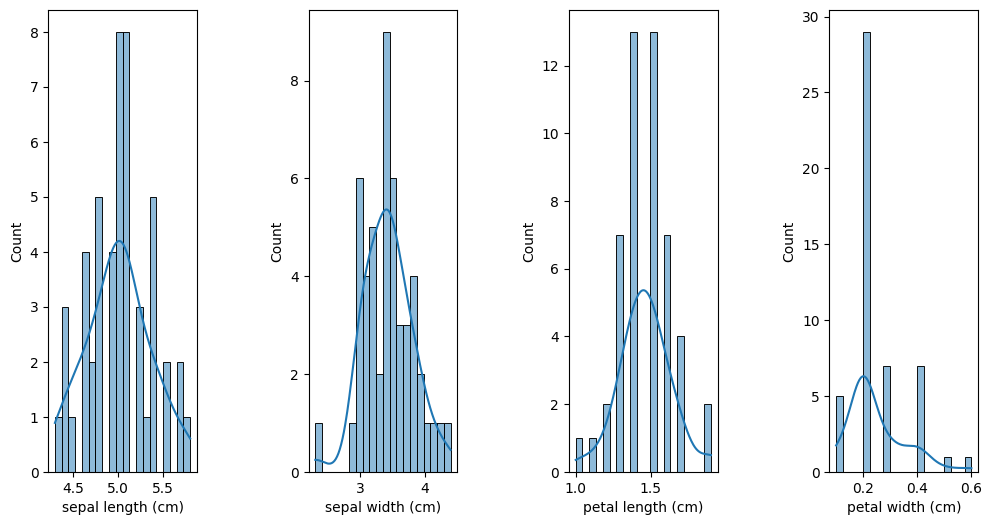

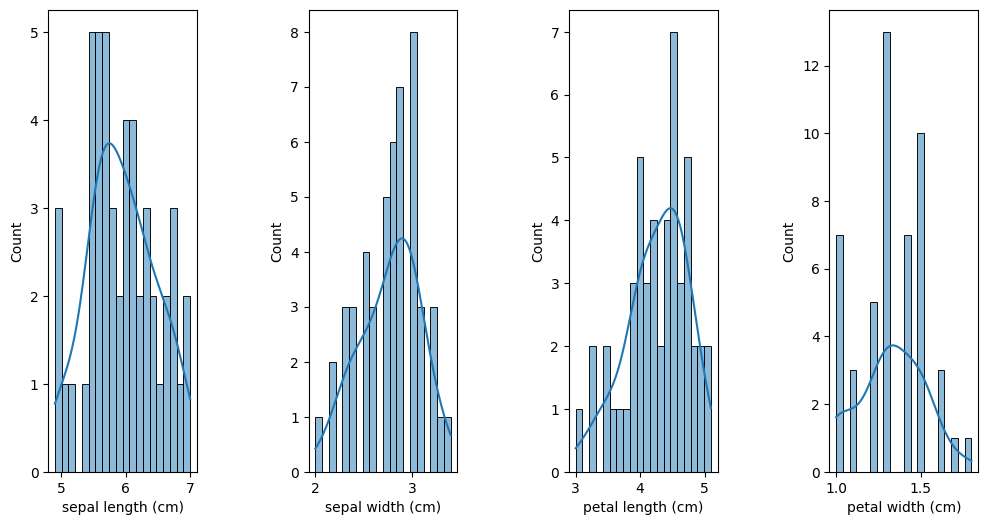

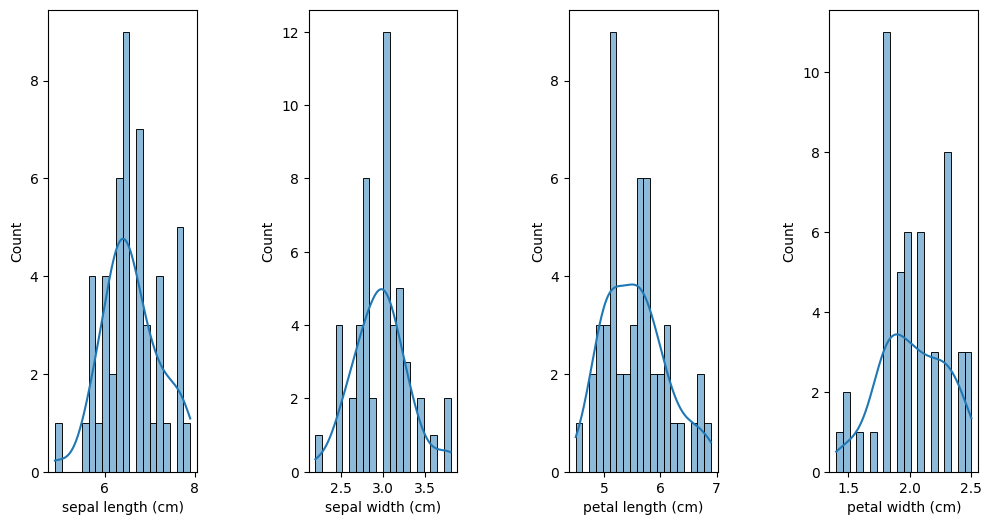

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_feature_dist(flower_type: int) -> None:
    v_data = data[data["target"] == flower_type]
    plt.figure(figsize=(12, 6))

    for i, feature in enumerate(v_data.columns[:-1]):
        plt.subplot(1, 4, i + 1)
        sns.histplot(v_data[feature], bins=20, kde=True)

    # Adjust the vertical space between subplots
    plt.subplots_adjust(wspace=0.75)

visualize_feature_dist(0)
visualize_feature_dist(1)
visualize_feature_dist(2)
plt.show()

## Splitting the Dataset into Train and Test Sets

Next we used the `train_test_split` function from scikit-learn to divide the Iris dataset into training and testing subsets. We decided to split the dataset using a 80-20 rule (80% of the dataset is used for training and 20% is used for testing). The 80-20 train-test split rule is a common choice, striking a balance between training set size for effective model learning and testing set size for robust performance evaluation. This split reduces overfitting concerns and ensures statistical significance in assessing the model's generalization to unseen data.

The code outputs the following:
- The shape of the training set (`X_train` and `y_train`).
- The shape of the testing set (`X_test` and `y_test`).
- The values of the training target variable (`y_train`).
- The values of the testing target variable (`y_test`).

The features (X) are the measurements of sepal length, sepal width, petal length, and petal width, while the target variable (y) is the species of the iris.

This step is crucial for preparing the data for model training and evaluation. It ensures that there is a separate set of data for model training and a separate set of data (testing set) to evaluate the model's performance after training on the training set. It is important that the model is evaluated on an "unseen" data, otherwise the evaluation results would be biased and incorrect.

### Functions/Modules Used
- `train_test_split`: A function from scikit-learn to split the dataset into training and testing sets.

In [238]:
from sklearn.model_selection import train_test_split

# Divide the dataset into a test and train subsets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=83)

print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(120, 4)
(30, 4)
139    2
50     1
88     1
105    2
72     1
      ..
146    2
0      0
39     0
23     0
82     1
Name: target, Length: 120, dtype: int64
122    2
18     0
145    2
31     0
120    2
106    2
35     0
17     0
26     0
104    2
11     0
84     1
126    2
114    2
147    2
55     1
30     0
61     1
92     1
75     1
109    2
96     1
79     1
33     0
44     0
10     0
45     0
58     1
138    2
149    2
Name: target, dtype: int64


## Creating and Training a Simple Neural Network Model

First model we trained was a simple NN model. We used TensorFlow and Keras to define, compile, and train a simple neural network model for the Iris dataset classification task. The model has one hidden layer with eight neurons and an output layer with three neurons (one for each iris species). The activation function used in the hidden layer is *ReLU*, and the output layer uses the *softmax* activation function.

### Functions/Modules Used
- `Sequential`: A linear stack of layers from Keras for building neural network models layer by layer.
- `Dense`: A densely-connected neural network layer from Keras.
- `to_categorical`: Converts a class vector (integers) to binary class matrix from Keras.
- `model.compile`: Configures the model for training with the specified optimizer, loss function, and metrics.
- `model.fit`: Trains the model on the training data and evaluates it on the validation data.

In [239]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Model definition
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train, y_train_categorical, epochs=300, batch_size=32, validation_data=(X_test, y_test_categorical))

Epoch 1/300
4/4 [==============================] - 0s 21ms/step - loss: 3.6177 - accuracy: 0.3250 - val_loss: 3.7508 - val_accuracy: 0.3667
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 3.5079 - accuracy: 0.3250 - val_loss: 3.6370 - val_accuracy: 0.3667
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 3.3930 - accuracy: 0.3250 - val_loss: 3.5291 - val_accuracy: 0.3667
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 3.2885 - accuracy: 0.3250 - val_loss: 3.4261 - val_accuracy: 0.3667
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 3.1835 - accuracy: 0.3250 - val_loss: 3.3297 - val_accuracy: 0.3667
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 3.0847 - accuracy: 0.3250 - val_loss: 3.2393 - val_accuracy: 0.3667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 3.0002 - accuracy: 0.3167 - val_loss: 3.1505 - val_accuracy: 0.3667
Epoch 8/300
4/4 [=========

## Creating and Training a Deep Neural Network Model

Next model we tried to train was a deep neural network model. The deep model has three hidden layers with 54, 18, and 9 neurons, respectively, and an output layer with three neurons (one for each iris species). All hidden layers use the *ReLU* activation function, and the output layer uses the *softmax* activation function. This code cell aims to explore a deeper architecture for the neural network model, potentially capturing more complex patterns in the data compared to the previous model.

### Functions/Modules Used
- `Sequential`, `Dense`: Similar to the previous neural network model definition and training.

In [240]:
# Deep neural net
deep_model = Sequential([
    Dense(54, input_dim=X_train.shape[1], activation='relu'),
    Dense(18, activation='relu'),
    Dense(9, activation='relu'),
    Dense(3, activation='softmax')
])

deep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
deep_model.fit(X_train, y_train_categorical, epochs=300, batch_size=32,
               validation_data=(X_test, y_test_categorical))

Epoch 1/300
4/4 [==============================] - 0s 22ms/step - loss: 1.2629 - accuracy: 0.3250 - val_loss: 1.1882 - val_accuracy: 0.3667
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1558 - accuracy: 0.3250 - val_loss: 1.1062 - val_accuracy: 0.3667
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0845 - accuracy: 0.4083 - val_loss: 1.0574 - val_accuracy: 0.6333
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0509 - accuracy: 0.6667 - val_loss: 1.0333 - val_accuracy: 0.6333
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0245 - accuracy: 0.5750 - val_loss: 0.9935 - val_accuracy: 0.4000
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0032 - accuracy: 0.3250 - val_loss: 0.9616 - val_accuracy: 0.4667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9699 - accuracy: 0.4500 - val_loss: 0.9439 - val_accuracy: 0.4333
Epoch 8/300
4/4 [=========

## Creating and Training a Convolutional Neural Network (CNN) Model

The final model we explored was the Convolutional Neural Network (CNN) model. The CNN model includes a 1D convolutional layer, max pooling layer, flattening layer, one hidden layer with 16 neurons and an output layer with three neurons. It is designed to capture spatial patterns in the input data.

We explored the use of a CNN architecture for the Iris dataset classification. CNNs are particularly effective at capturing spatial dependencies in data, and this experiment aims to assess whether this architecture improves model performance.

### Functions/Modules Used
- `Conv1D`, `MaxPooling1D`, `Flatten`: Layers from Keras for constructing a 1D CNN.
- `to_categorical`: Converts a class vector (integers) to binary class matrix from Keras.

In [241]:
# CNN
import numpy as np
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the data for CNN (assuming X_train and X_test are DataFrames)
X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1])

print("Reshaped X_train shape:", X_train_reshaped.shape)
print("Reshaped X_test shape:", X_test_reshaped.shape)

# Assuming y_train and y_test are one-hot encoded
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Model definition
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Model compilation
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model_cnn.fit(X_train_reshaped, y_train_categorical, epochs=300, batch_size=32, validation_data=(X_test_reshaped, y_test_categorical))

Reshaped X_train shape: (120, 4)
Reshaped X_test shape: (30, 4)
Epoch 1/300
4/4 [==============================] - 0s 22ms/step - loss: 1.1993 - accuracy: 0.6500 - val_loss: 0.9928 - val_accuracy: 0.7333
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0797 - accuracy: 0.6500 - val_loss: 0.9247 - val_accuracy: 0.7333
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9990 - accuracy: 0.6500 - val_loss: 0.8783 - val_accuracy: 0.7333
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9169 - accuracy: 0.6500 - val_loss: 0.8510 - val_accuracy: 0.7333
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8774 - accuracy: 0.6500 - val_loss: 0.8373 - val_accuracy: 0.7667
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.7333 - val_loss: 0.8289 - val_accuracy: 0.9333
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8348 - accuracy: 0.9250 - va

## Evaluating the Neural Network Models

After the training of the models, we evaluated their performance on the test data. To focus only on different network architectures, we used the same parameters for model creation and training. All models used the *categorical crossentropy* as the loss function and the *Adam* optimizer for training. Epochs for each training were set to 300 and batch size to 32.

For evaluation purpose we wrote a function that evaluates each model with the usage of following metrics:
- Accuracy of the model on the test data.
- Classification report containing precision, recall, f1-score, and support.
- Confusion matrix showing the true positive, true negative, false positive, and false negative values.

We also wrote a function that renders a provided confusion matrix. We call this function for each model to visualize the confusion matrices.

### Functions/Modules Used
- `accuracy_score`: Computes the accuracy classification score from scikit-learn.
- `classification_report`: Builds a text report showing the main classification metrics from scikit-learn.
- `confusion_matrix`: Computes the confusion matrix to evaluate the accuracy of classification from scikit-learn.

------------- Simple NN Model ------------- 

1/1 [==============================] - 0s 22ms/step
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
----------------------------------------------



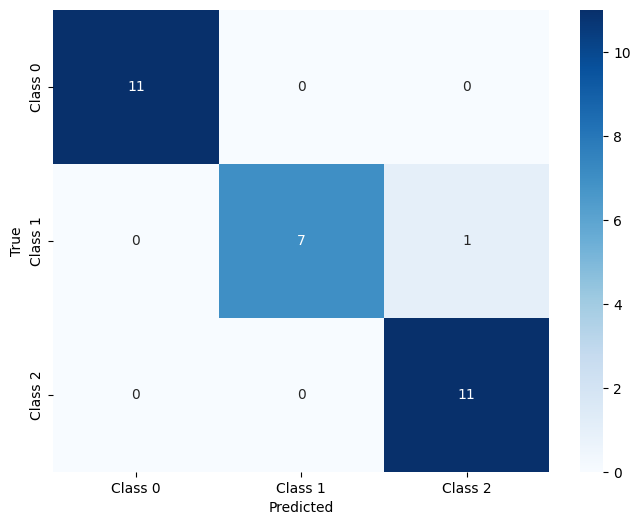

------------- Deep NN Model ------------- 

1/1 [==============================] - 0s 24ms/step
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
----------------------------------------------



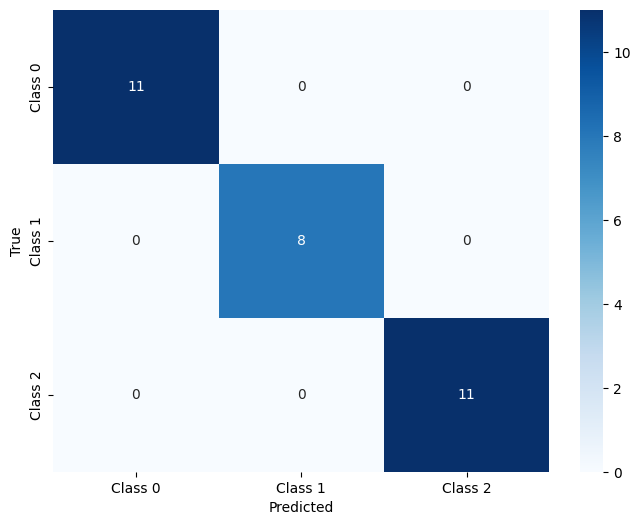

------------- Convolutional NN Model ------------- 

1/1 [==============================] - 0s 27ms/step
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
----------------------------------------------



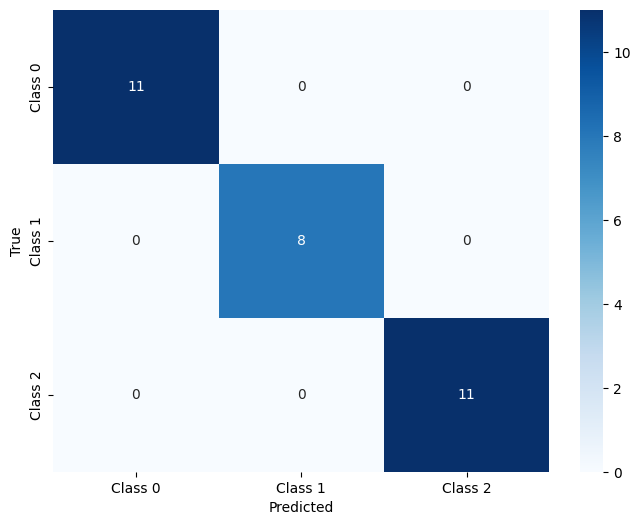

In [242]:
from typing import Tuple, Any, Union
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(eval_model, eval_x_test, eval_y_test, label: str) -> Tuple[float, Union[str, dict], Any]:
    print("-------------", label, "-------------","\n")
    # Predictions on test data
    y_pred = tf.argmax(eval_model.predict(eval_x_test), axis=1)

    # Accuracy
    accuracy = accuracy_score(eval_y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Classification Report
    class_report = classification_report(eval_y_test, y_pred)
    print('Classification Report:\n', class_report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(eval_y_test, y_pred)
    print('Confusion Matrix:\n', conf_matrix)
    print("----------------------------------------------\n")
    return accuracy, class_report, conf_matrix

def plot_confusion_matrix(conf_matrix, class_names) -> None:
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

result_simple_nn = evaluate_model(model, X_test, y_test, "Simple NN Model")
plot_confusion_matrix(result_simple_nn[2], class_names=['Class 0', 'Class 1', 'Class 2'])

result_deep_nn = evaluate_model(deep_model, X_test, y_test, "Deep NN Model")
plot_confusion_matrix(result_deep_nn[2], class_names=['Class 0', 'Class 1', 'Class 2'])

result_cnn = evaluate_model(model_cnn, X_test, y_test, "Convolutional NN Model")
plot_confusion_matrix(result_cnn[2], class_names=['Class 0', 'Class 1', 'Class 2'])

## Results

In this assignment, we explored the application of various neural network architectures for the classification task on the Iris dataset. The dataset contains samples of three species of iris flowers, and our goal was to classify them accurately using different neural network models (architectures).

### Key Findings

1. **Simple Neural Network Model:**
   - A simple neural network with one hidden layer yielded satisfactory results, achieving an accuracy above the 90% threshold.
   - The model used the ReLU activation function in the hidden layer and softmax in the output layer.
   - Evaluation metrics such as accuracy, precision, recall, and the confusion matrix provided insights into the model's performance.

2. **Deep Neural Network Model:**
   - Increasing the depth of the neural network to three hidden layers with more neurons did not notably improve classification accuracy.
   - Despite having a more complex architecture, the deeper model did not significantly outperform the simpler neural network on the Iris dataset.

3. **Convolutional Neural Network (CNN) Model:**
   - Introducing a 1D CNN architecture for a dataset like Iris, which lacks spatial dependencies, did not lead to considerable performance improvement.
   - Using such a complex network as CNN is rather "overkill" for a small, simple and straightforward dataset like Iris
   - CNNs are more effective for tasks where spatial patterns and dependencies are crucial, such as image classification.

4. **Model Selection:**
   - For datasets with simple structures like Iris, a moderately sized simple neural network is often sufficient.
   - Deeper architectures and convolutional layers may not necessarily lead to better performance and can increase model complexity without corresponding benefits.

### Future Optimizations

1. **Additional Datasets:**
   - Experimenting with a more diverse set of datasets could provide further insights into the strengths and limitations of different neural network architectures.

2. **Hyperparameter Optimization:**
   - Further experimentation with hyperparameter tuning, such as adjusting learning rates, batch sizes, and the number of epochs, could potentially enhance model performance.
   - Extensive hyperparameter tuning and optimization could be explored to identify the most effective set of parameters for each model.

3. **Ensemble Approaches:**
   - Combining predictions from multiple models using ensemble techniques might enhance overall classification performance.


## Conclusion

In conclusion, selecting an appropriate neural network architecture is a task-specific decision, and understanding the nature of the data is crucial for achieving optimal results. While simple models may suffice for certain datasets, more complex architectures should be reserved for tasks that demand their specific capabilities.
